### To see the data

In [1]:
# Import pandas to view the dataset
import pandas as pd

# Set data to the CSV file
file_path = 'ecoli.csv'
data = pd.read_csv(file_path)

# Displaying the entire DataSet
print(data)

           X1        X2        X3        X4        X5  C
0   -0.007564  0.222171  0.158978  1.159728  0.267387  0
1    0.171858 -0.041690  0.250635  0.165851  0.461043  0
2    0.736046  0.343963  0.749114  0.561858  0.712554  0
3    0.000639 -0.175082  0.070584  0.317284  0.582597  0
4    0.571760 -0.244216  0.234515  0.902095  0.594026  0
..        ...       ...       ...       ...       ... ..
124  0.648946  0.946382  0.893618  0.539939  0.532365  1
125  0.768015  0.955685  0.495043  0.100583  0.836665  1
126  0.649908  0.845137  0.406619  0.654427  1.003261  1
127  0.221111  0.787071  0.318218  0.867372  0.682562  1
128  0.423381  1.089316  1.486272  0.250884  0.440059  1

[129 rows x 6 columns]


In [2]:
# Data descriptions
print(data.describe())

               X1          X2          X3          X4          X5           C
count  129.000000  129.000000  129.000000  129.000000  129.000000  129.000000
mean     0.539102    0.597149    0.521040    0.686822    0.565779    0.403101
std      0.478155    0.433768    0.378367    0.438045    0.412171    0.492433
min     -0.430791   -0.281866   -0.263064   -0.600203   -0.484916    0.000000
25%      0.180917    0.284631    0.250635    0.416989    0.267387    0.000000
50%      0.559401    0.535186    0.495043    0.716888    0.568919    0.000000
75%      0.826496    0.864219    0.793372    0.962953    0.836665    1.000000
max      2.044694    1.711213    1.486272    1.743930    1.848438    1.000000


In this case the futures of data has a normal distribution, and the classifier are only 0 in the inner membrane or 1 in the perisplasm so Gaussian Naïve Bayes model would be a good fit.

# Application of Gaussian Naïve Bayes

### Data cleaning

In [3]:
# Data Cleaning Checks
# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Check for outliers with interquartile range
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
# Define IQR and outliers
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

# Check data types
data_types = data.dtypes

# Check for class balance
class_balance = data['C'].value_counts(normalize=True)

# Show the results
cleaning_checks = {
    'Missing Values': missing_values,
    'Duplicate Rows': duplicate_rows,
    'Outliers (IQR Method)': outliers,
    'Data Types': data_types,
    'Class Balance': class_balance
}

cleaning_checks

{'Missing Values': X1    0
 X2    0
 X3    0
 X4    0
 X5    0
 C     0
 dtype: int64,
 'Duplicate Rows': 0,
 'Outliers (IQR Method)': X1    1
 X2    0
 X3    0
 X4    4
 X5    1
 C     0
 dtype: int64,
 'Data Types': X1    float64
 X2    float64
 X3    float64
 X4    float64
 X5    float64
 C       int64
 dtype: object,
 'Class Balance': 0    0.596899
 1    0.403101
 Name: C, dtype: float64}

The data looks pretty clean however it's a bit imbalanced and there's outliers in x1, x4 and x5. 

### Data splitting

In [4]:
# To Standardising the features
from sklearn.preprocessing import StandardScaler
# Use SMOTE to blance the data
from imblearn.over_sampling import SMOTE
# Split data into train and test datasets
from sklearn.model_selection import train_test_split

# Calculate Q1, Q3, and IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Set bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask for rows without outliers
mask = ((data >= lower_bound) & (data <= upper_bound))

# Apply the mask and keep rows without outliers
data_cleaned = data[mask].dropna()

# Scaling the features
scaler = StandardScaler()
# Excluing column C for X
X_scaled = scaler.fit_transform(data_cleaned.drop('C', axis=1))
y = data_cleaned['C']

# Apply SMOTE to blance the data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

# Split the dataset into training and testing sets by 70:30, set the same split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Show the numbers
data_cleaned.shape, X_smote.shape, y_smote.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((123, 6), (148, 5), (148,), (103, 5), (45, 5), (103,), (45,))

SMOTE generated new samples to blance the data.

### Train Gaussian Naïve Bayes model with training data

In [5]:
# Gaussian Naïve Bayes from sklearn
from sklearn.naive_bayes import GaussianNB

# Name Gaussian Naïve Bayes classifier
nbclassifier = GaussianNB()

# Train the model using the training sets
nbclassifier.fit(X_train, y_train)

# Make predictions
y_pred_nb = nbclassifier.predict(X_test)

# Returning the classifier and predictions
nbclassifier, y_pred_nb

(GaussianNB(),
 array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        0], dtype=int64))

# Explanation of Naïve Bayes

Giving the equation of Bayes' Theorem and this dataset: $$ P(C | X) = \frac{P(X | C) \times P(C)}{P(X)} $$
'C' can be seen as a category(in the inner membrane or in the perisplasm in this dataset), 'X' as the Features(X1 to X5). Giving a new protein with features x1 to x5. P(C|X) is the probability of this new protein(X) is in the inner membrane(C) equal to the probability of observing those features x1 to x5 of this protein in the inner membrane P(X|C) times the initial probability(in this dataset) of how many protein was in the inner membrane P(C) divided by the probability of observing features of this new protein in general P(X).

In the dataset, there is more than one feature and Naïve considers them as independent so P(C|X) will be a combination of $$ P(X | C) = P(X_1 | C) \times P(X_2 | C) \times P(X_3 | C) \times P(X_4 | C)\times P(X_5 | C) $$ using the Gaussian probability density function.

After getting the number, the system will calculate the probability of this new protein is in the perisplasm again. Comparing the two probabilities, the new protein is predicted in the higher probability class.

# Application of a Logistic Regression

In [6]:
# Logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Name Logistic regression classifier
lrclassifier = LogisticRegression()

# Train the model using the training data sets
lrclassifier.fit(X_train, y_train)

# Make predictions
y_pred_lr = lrclassifier.predict(X_test)

# Returning the classifier and predictions
lrclassifier, y_pred_lr

(LogisticRegression(),
 array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
        0], dtype=int64))

# Explanation of Logistic Regression

For logistic regression, the probability of P(C|X) (the location of the protein) with features X1 to X5 can be seen as a sigmoid function:
$$ P(C | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5)}} $$
This S-shaped curve is between 0 and 1. Beta 0 to 5 are the model's coefficients learned from the training data.

A threshold can be set, usually will be 0.5. With a new set of futures X1 to X5, if P(C|X) is greater than the threshold the protein is predicted to be in the one class. Otherwise, it is predicted to be in the zero class.

# Validating the performance for both methods

Apply of Cross-Validation on Gaussian Naïve Bayes and Logistic Regression.

In [7]:
# Create X, y full data
X_full = data.drop('C', axis=1)
y_full = data['C']

In [8]:
# Cross-Validation from sklearn
from sklearn.model_selection import cross_val_score

# Accuracy scores with 5-folds
accuracy_scores_nb = cross_val_score(nbclassifier, X_full, y_full, cv=5, scoring='accuracy')
accuracy_scores_lr = cross_val_score(lrclassifier, X_full, y_full, cv=5, scoring='accuracy')

# Calculate mean and standard deviation for each model
mean_accuracy_nb = accuracy_scores_nb.mean()
std_accuracy_nb = accuracy_scores_nb.std()
mean_accuracy_lr = accuracy_scores_lr.mean()
std_accuracy_lr = accuracy_scores_lr.std()

In [9]:
# Printout the results in 2 decimal places
print("Naive Bayes Cross-Validation Results:")
print(f"Mean Accuracy: {mean_accuracy_nb:.2f}")
print(f"Standard Deviation: {std_accuracy_nb:.2f}\n")

print("Logistic Regression Cross-Validation Results:")
print(f"Mean Accuracy: {mean_accuracy_lr:.2f}")
print(f"Standard Deviation: {std_accuracy_lr:.2f}")

Naive Bayes Cross-Validation Results:
Mean Accuracy: 0.71
Standard Deviation: 0.06

Logistic Regression Cross-Validation Results:
Mean Accuracy: 0.73
Standard Deviation: 0.07


Apply of holdout method on Gaussian Naïve Bayes

In [10]:
from sklearn.metrics import accuracy_score
X_Htrain, X_Htest, y_Htrain, y_Htest = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# Train the model using the training sets
nbclassifier.fit(X_Htrain, y_Htrain)

# Make new predictions
y_Hpred_nb = nbclassifier.predict(X_Htest)

accuracy = accuracy_score(y_Htest, y_Hpred_nb)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8444444444444444


Gaussian Naïve Bayes works the best when using 70% random data of the full dataset as training data.

Apply of holdout method on Logistic Regression

In [11]:
X_Htrain, X_Htest, y_Htrain, y_Htest = train_test_split(X_smote, y_smote, test_size=0.4, random_state=42)

# Train the model using the training sets
lrclassifier.fit(X_Htrain, y_Htrain)

# Make new predictions
y_Hpred_lr = lrclassifier.predict(X_Htest)

accuracy = accuracy_score(y_Htest, y_Hpred_lr)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8166666666666667


Logistic Regression works the best when using 60% random data of the full dataset as training data.

# Metrics to measure performance

### Test results and Confusion Matrix for Naïve Bayes

In [12]:
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_test, y_pred_nb)

# Print the confusion matrix for Naïve Bayes
print("The Confusin Matrix for Naïve Bayes :\n",cm_nb)
print("True Positives(TP) : ",cm_nb[0,0])
print("True Negatives(TN) : ",cm_nb[1,1])
print("False Positives(FP) : ",cm_nb[0,1])
print("False Negatives(FN) : ",cm_nb[1,0])

The Confusin Matrix for Naïve Bayes :
 [[20  4]
 [ 3 18]]
True Positives(TP) :  20
True Negatives(TN) :  18
False Positives(FP) :  4
False Negatives(FN) :  3


In [13]:
# Measuring the records
from sklearn.metrics import classification_report

# Print report message for Naïve Bayes
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.82      0.86      0.84        21

    accuracy                           0.84        45
   macro avg       0.84      0.85      0.84        45
weighted avg       0.85      0.84      0.84        45



### Test results and Confusion Matrix for Logistic Regression

In [14]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Print the confusion matrix for Logistic Regression
print("The Confusin Matrix for Logistic Regression :\n",cm_lr)
print("True Positives(TP) : ",cm_lr[0,0])
print("True Negatives(TN) : ",cm_lr[1,1])
print("False Positives(FP) : ",cm_lr[0,1])
print("False Negatives(FN) : ",cm_lr[1,0])

The Confusin Matrix for Logistic Regression :
 [[19  5]
 [ 5 16]]
True Positives(TP) :  19
True Negatives(TN) :  16
False Positives(FP) :  5
False Negatives(FN) :  5


In [15]:
# Print report message for Logistic Regression
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.76      0.76      0.76        21

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45



# Metrics Used

The classification_report function from sklearn provides 4 metrics: precision, recall, f1-score and support.

Precision: $$ Precision = \frac{True Positives}{True Positives + False Positives} $$ It tells the proportion of predicted positives that are actually positive.

Recall: $$ Recall = \frac{True Positives}{True Positives + False Negatives} $$ Tells the proportion of actual positives that were predicted correctly.

F1-score: $$ F1-Score = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} $$
F1 Score is the harmonic mean of Precision and Recall, high F1 Score gives a balanced Precision and Recall.

Support: Tells how many instances (0 and 1) are there. Important to see if the model performance is imbalanced.

# Conclusions from the result

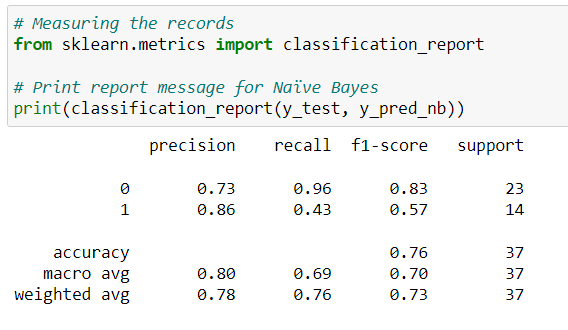

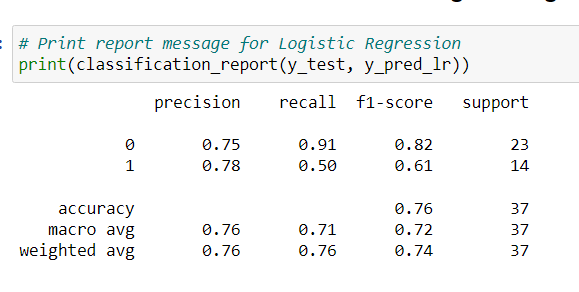

Before applying SMOTE to balance the classes, both models have the same accuracy of 76% on this train and test data, which means both models should have a similar efficiency in making predictions. Naïve Bayes has a precision of 73% for class 0 and 86% for class 1 (better than Logistic Regression 78%). However, Logistic Regression has a more balanced precision. Naïve Bayes has a higher recall for identifying class 0, and Logistic Regression is better at identifying class 1. Logistic Regression has a better balance between precision and recall for class 1 as a higher F1-Score. Moreover, the Naïve Bayes module has slightly higher False Negatives.

However, the metrics show that recall and F1-Score are much lower for class 1, this could be a result of imbalanced data. The test results shown under the 'Test results and Confusion Matrix for Logistic Regression' session are after applying SMOTE. The accuracy for Gaussian Naïve Bayes increased sufficiently and reached over 80%. At the same time, Logistic Regression only increased accuracy by 2% and worked slightly better to predict true Negatives.

In conclusion, Gaussian Naïve Bayes works better with a more balanced dataset. From the holdout method, the Accuracy Score is the highest using 70% data of the full dataset. On the other hand, Logistic Regression requires less condition and data cleaning and is more accurate with 60% training sample. From Cross-Validation the Logistic Regression model is slightly more accurate on average than the Naïve Bayes model for this dataset.

In [16]:
# Logistic Regression future importance array
feature_importance_lr = lrclassifier.coef_[0]

print("Feature importances for Logistic Regression:")
# Iterate over the array of feature importances
for i, coef in enumerate(feature_importance_lr):
    print(f"X {i+1}: {coef}") #X+1 to show right number

Feature importances for Logistic Regression:
X 1: 0.061101948950758406
X 2: 0.6590061912710777
X 3: -0.04047612335816382
X 4: -0.6840794087167301
X 5: -0.7438392935319456


Extra thought: why the Logistic Regression model does not improve after balancing the data might be because, unlike Gaussian Naïve Bayes assumes independence between features. It is a linear model with coefficients, so dropping the column with less weight like X3 should improve the performance for Logistic Regression. As the overall performance is already even between the two models, no future action will be taken this time.

# Visualisation in validating the methods

Plot the confusion matrix for Naïve Bayes

<Axes: title={'center': 'Naïve Bayes Confusion Matrix'}>

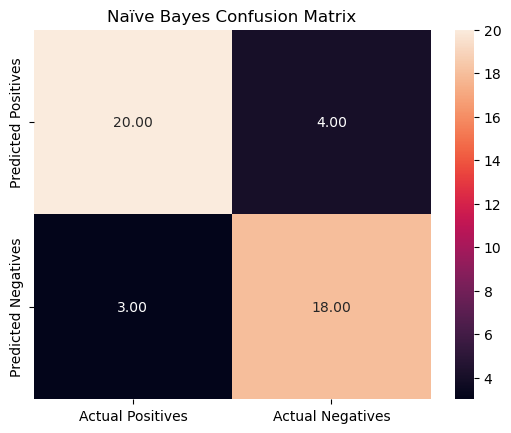

In [17]:
import matplotlib.pyplot as plt
# Confusion matrix
cm_matrix = pd.DataFrame(data=cm_nb, columns=['Actual Positives', 'Actual Negatives'],
                         index = ['Predicted Positives', 'Predicted Negatives'])
plt.title('Naïve Bayes Confusion Matrix')
# Using heatmap
import seaborn as sns
sns.heatmap(cm_matrix, annot=True, fmt='.2f')

Plot the Receiver Operating Curve (ROC) for Naïve Bayes

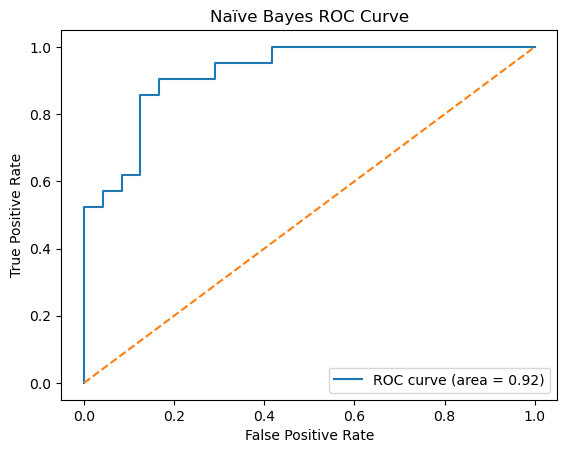

In [18]:
from sklearn.metrics import roc_curve, auc
# Probability scores for positive class
fpr, tpr, thresholds = roc_curve(y_test, nbclassifier.predict_proba(X_test)[:,1])
# Calculates area under the curve and plot
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
# Add reference Line and plot
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naïve Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

Plot the confusion matrix for Logistic Regression

<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

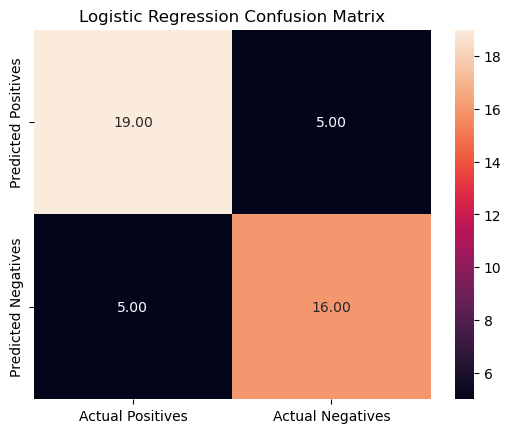

In [19]:
# Confusion matrix
cm_matrix = pd.DataFrame(data=cm_lr, columns=['Actual Positives', 'Actual Negatives'],
                         index = ['Predicted Positives', 'Predicted Negatives'])
plt.title('Logistic Regression Confusion Matrix')
# Using heatmap
sns.heatmap(cm_matrix, annot=True, fmt='.2f')

Plot the Receiver Operating Curve (ROC) for Logistic Regression

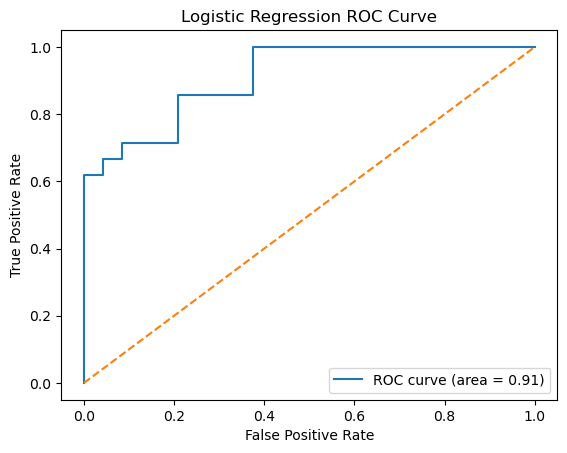

In [20]:
# Probability scores for positive class
fpr, tpr, thresholds = roc_curve(y_test, lrclassifier.predict_proba(X_test)[:,1])
# Calculates area under the curve and plot
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
# Add reference Line and plot
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

# References

Ray, S. (2023) Naive Bayes classifier explained: Applications and practice problems of naive Bayes classifier, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/ (Accessed: 12 December 2023). 

VanderPlas, J. (no date) In depth: Naive Bayes classification, In Depth: Naive Bayes Classification | Python Data Science Handbook. Available at: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html (Accessed: 12 December 2023). 

Math and equations. Available at: https://jupyterbook.org/en/stable/content/math.html (Accessed: 15 December 2023). 

Week 11: Model Building and Validation LabNote (Accessed: 18 December 2023).

How to plot ROC curve in python (1960) Stack Overflow. Available at: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python (Accessed: 19 December 2023). 

Filho, M. (2023) How to get feature importance in logistic regression, Forecastegy (Alt + H). Available at: https://forecastegy.com/posts/feature-importance-in-logistic-regression/ (Accessed: 20 December 2023). 